# 탐욕적 기법

### 8.1 거스름돈 동전 최소화
#### 우리나라 동전
- 620원: 500원 + 100원 + 10원×2 → 동전 4개
- 345원: 100원×3 + 10원×4 + 5원 → 동전 8개
- 572원: 500원 + 50원 + 10원×2 + 1원×2 → 동전 6개

#### 탐욕적 전략
- 가장 액수가 큰 동전부터 최대한 사용하면서 거스름돈을 맞춤
- 현재까지는 최적해. 만약 60원 동전이 생긴다면?
- 620원 : 500+60x2(3개동전)

#### 향상 최적해를 구하는 방법
- 방법 1 : 완전탐색 -> 지수함수
- 방법 2 : 동적 계획법 -> O(mV)
#### m은 동전종류  , v는 거스름돈 액수 , O(V): 공간복잡도
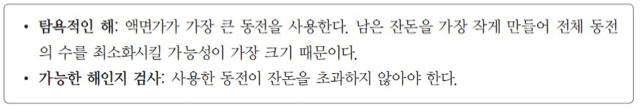
#### 탐욕적 전략의 동전 최소화 알고리즘 

예:580원
1. 탐욕적인 해 : 가장 탐욕적인 500원
2. 가능한 해인지 검사 : 500원 1개 사용해도 거스름돈 넘치지 X -> 가능한해
3. 완료검사 : 잔액 80원 (더 작은 문제로 해결)
500X1 + 100X0 + 50X1 + 10X3

예:80원
1. 탐욕적인 해 : 가장 탐욕적인 100원
2. 가능한 해인지 검사 : 남은 돈 < 액수 가능한해 X, 1단계
3. 그 다음 탐욕적인해 : 탐욕적인 50원 
4. 가능한 해인지 검사 : 50원 1개 사용해도 거스름돈 넘치지 X => 가능한해
5. 완료검사 : 잔액 30원 (더 작은 문제로 해결) 50X1 + 10X3


In [ ]:
def min_coins_greedy( coins, V ): 

    count = []     # 각 동전의 개수 저장

    for i in range(len(coins)) :

        cnt = V // coins[i]    # 현재 액면가의 최대 사용 가능 개수

        count.append(cnt)

        V -= cnt * coins[i]   # 남은 거스름돈 계산

    return count

 

 

coins = [500 , 100 , 50 , 10 , 5 , 1] 

V = 580

print("잔돈 액수 = ", V)

print("동전 종류 = ", coins)

print("동전 개수 = ", min_coins_greedy(coins, V ))

for i in range(len(coins)): 동전 액면가 M 가지 -> 시간복잡도 O(m)
완전탐색 지수함수 , 동적계획법 (mv)보다 우월
거스름돈 V가 매우크다면 동적계획법보다 시간 공간적으로 훨씬 유리 ,장점만?
최적해를 보장할까?
#### 동전체계에 따라 다름 ( 항상 보장하지 않음)
예)우리나라에 60원 동전 발행된다면?
120월 ? 100X1 + 10x2 => 3개동전  
60원X2개 => 2개 동전  
### 동전 액면가 중에서 어떤 2개를 고르더라도 큰 액면가를 작은 액면가로 나누어 떨어지는 동전체계는 최적해를 보장 
0-1 배낭 채우기 탐욕적 전략  
탐욕 1: 무게와 상관없이 가장 비싼 물건부터 넣어보는 방법  
탐욕 2: 단위 무게당 가격이 가장 높은 물건부터 넣어보는 방법  
탐욕 3: 가장 가벼운 물건부터 넣어보는 방법  

탐욕적 기법  
탐욕적인 해 : 무게당 가격이 비싼 물건부터 순서대로 배낭의 남은 용량을 넘지 않는 최대한으로 채움  
가능한 해 검사 : 배낭의 용량이 넘치지만 않으면 항상 가능한 해
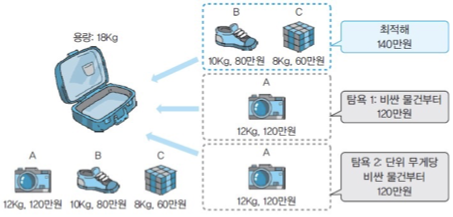



In [1]:
def knapSack_fractional_greedy(obj, W): 

    obj.sort(key = lambda o: o[2]/o[1], reverse=True)   # 내림차순정렬  o[2]가격 / o[1]무게  무게당 가격 내림차순 정렬

 

    totalValue = 0              # 전체 배낭의 가치

    for o in obj :

        if W <= 0 : break       # 용량이 다 찬 경우

        if W - o[1] >= 0:       # 물건 전체가 들어갈 수 있는 경우

            W -= o[1] 

            totalValue += o[2] 

        else:                   # 물건의 일부만 넣을 수 있는 경우

            fraction = W / o[1]

            totalValue += o[2] * fraction 

            W = int(W - (o[1] * fraction)) 

 

    return totalValue

 

 

obj = [ ("A", 10, 80), ("B", 12, 120), ("C", 8, 60)]  # (물건,무게,가치)

print("W = 18 ", obj)

print("부분적인배낭(18): ", knapSack_fractional_greedy(obj,18), end='\n\n') 

 

obj = [ ("A", 10, 60), ("B", 40, 40), ("C", 20, 100), ("D", 30, 120) ]

print("W = 50 ", obj)

print("부분적인배낭(50): ", knapSack_fractional_greedy(obj, 50)) 

W = 18  [('A', 10, 80), ('B', 12, 120), ('C', 8, 60)]
부분적인배낭(18):  168.0

W = 50  [('A', 10, 60), ('B', 40, 40), ('C', 20, 100), ('D', 30, 120)]
부분적인배낭(50):  240.0


W = 18  [('A', 10, 80), ('B', 12, 120), ('C', 8, 60)](물건, 무게 , 가치)
부분적인배낭(18):  168.0 => 1x120(b)+60x80/10(a)+0(c)

W = 50  [('A', 10, 60), ('B', 40, 40), ('C', 20, 100), ('D', 30, 120)]
부분적인배낭(50):  240.0 => 60(a) + 100(c) + 20x120/30(d)+0(b) 

### 시간복잡도: 정렬에 좌우 nlog2^n(2행에서 정렬 필요)
항상 최적해를 구함  

## 해결방안
서로 소 부분집합과 Union-Find 알고리즘
- find(x): 원소 x가 속한 집합 -> 보통은 "대표원소" 반환
- union(x,y): 원소 x가 y에 속한 집합을 하나로 뭉침
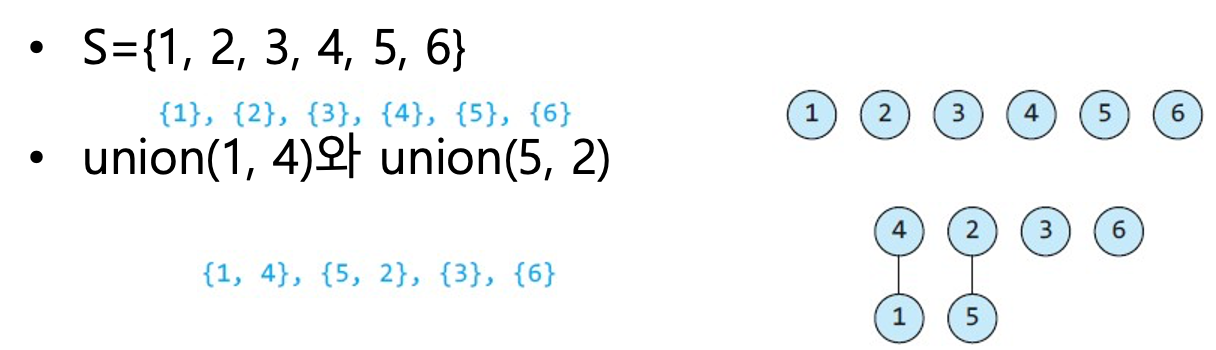
- 1, 5는 루트 노드 X, 각각 4와 2에 의해 대표되는 부분집합의 원소일뿐
- 여기서 find(1) = 4, find(5) = 2, find(4)=4, find(3)=3
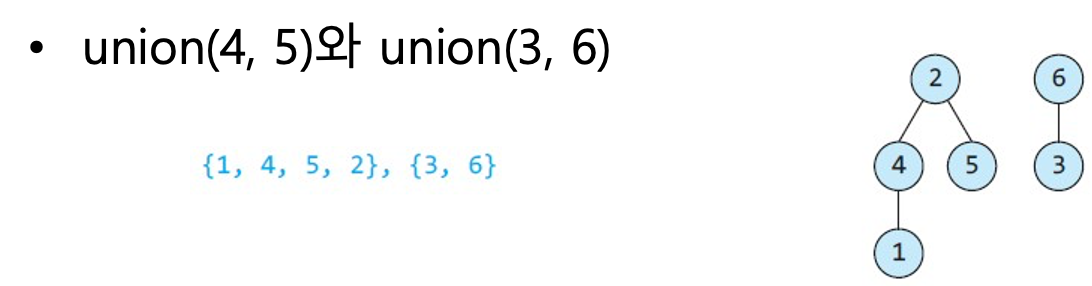
### 위 그림에서 
### 간선union(4,5)를 삽입할 경우 => find(4) = 2, find(5) = 2 같은 간선에 속하므로 간선(4,5)는 삽입 x
### 간선union(3,6)를 삽입할 경우 => find(3) = 6, find(5) = 2 다른 집합에 속하므로 간선(3,6)는 삽입 O

In [1]:
class disjointSets:

    def __init__(self, n):

        self.parent = [-1]*n    # 각 노드는 모두 루트 노드

        self.set_size = n       # 전체 집합의 개수

 

    def find(self, id) :       # 정점 id가 속한 집합의 대표번호 탐색

        while (self.parent[id] >= 0) :# 부모가 있으면(-1이 아닌 동안)

            id = self.parent[id]   # id를 부모 id로 갱신

        return id            # 최종 id 반환. 루트 노드의 id임

 

    def union(self, s1, s2) :           # 두 집합을 병합(s1을 s2에 병합시킴)

        self.parent[s1] = s2      # s1을 s2에 병합시킴

        self.set_size = self.set_size-1    # 집합의 개수가 줄어 듦

def MSTKruskal(V, adj):

    n = len(V)              # 정점의 개수

    dsets = disjointSets(n)       # disjointSets 객체 생성 및 초기화
    E = []                 # 간선 리스트
    for i in range(n-1) :       # 모든 간선을 리스트에 넣음
        for j in range(i+1, n) :
            if adj[i][j] != None :
                E.append((i,j,adj[i][j]))   # 튜플로 저장
    E.sort(key= lambda e : e[2])
    ecount = 0                  # MST에 포함된 간선의 수
    for i in range(len(E)):
        e = E[i]
        uset = dsets.find(e[0])     # 두 정점이 속한 집합의 루트
        vset = dsets.find(e[1])
        if uset != vset :       # 두 루트가 다르면
            dsets.union(uset, vset)   # 두 집합을 합함
            print("간선 추가 : (%s, %s, %d)" % (V[e[0]], V[e[1]], e[2]))
            ecount += 1         # 간선이 하나 추가됨
            if ecount == n-1 :
               break

vertex =   [  'A', 'B', 'C', 'D', 'E', 'F', 'G' ]
weight = [ [ None,  29,None,None,None,  10,None ],

           [   29,None,  16,None,None,None,  15 ],

           [ None,  16,None,  12,None,None,None ],

           [ None,None,  12,None,  22,None,  18 ],

           [ None,None,None,  22,None,  27,  25 ],

           [   10,None,None,None,  27,None,None ],

           [ None,  15,None,  18,  25,None,None ]]

print("MST By Kruskal's Algorithm")

MSTKruskal(vertex, weight)

MST By Kruskal's Algorithm
간선 추가 : (A, F, 10)
간선 추가 : (C, D, 12)
간선 추가 : (B, G, 15)
간선 추가 : (B, C, 16)
간선 추가 : (D, E, 22)
간선 추가 : (E, F, 27)


시간복잡도 (인접행렬)  
3-5 행: O(n^2)  
10행 : O(elog_2 e) E.sort(key = lambda e : e[2])  

O(n^2elog_2 e). 

인접리스트 표현: O(elog_2 e). 

**결국에 정렬알고리즘에 따라**


### Floyd-Warshall 알고리즘(Floyd 알고리즘)  

### 동적 계획법 사용하여 모든 정점에서 다른 모든 정점까지의 최단 경로를 한꺼번에 구하기  

## 복잡도: 𝑂(𝑛^3), 8장 최단거리구하는 Dijkstra O(n^2)  

## 하지만 Floyd 알고리즘은 하나의 정점에서 모든 정점까지 최단 경로 찾는 시간  

## 따라서 두 알고리즘 차이X, Floyd 알고리즘은 매우 간결한 반복구문 사용

## 8.5 Dijkstra의 최단경로 알고리즘
### 한 정점에서 다른 모든 정점까지의 최단 경로 거리
### Dijkstra가 선택한 탐욕
- 최단거리가 확정된 정점들과 간선으로 직접 연결된 정점들 중에  서 가장 가까운 정점을 선택한다.
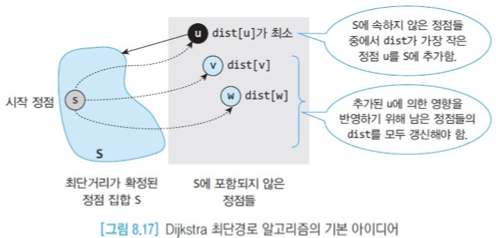

#### dist[] 배열이용, dist[u]가 최소라면 S에추가, 남은 v,w의 dist 값 갱신 
각 정점 𝑤에 대해  
- u를 거쳐서 w로 가는 새로운 경로가 더 짧다면 dist[w] 갱신  
- dist[w] = dist[v] + weight[u][w]  
- 그렇지 않다면 dist[w] 유지  
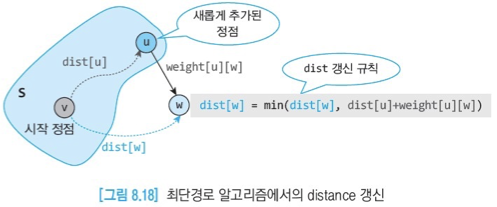

### A가 시작 정점인 경우  
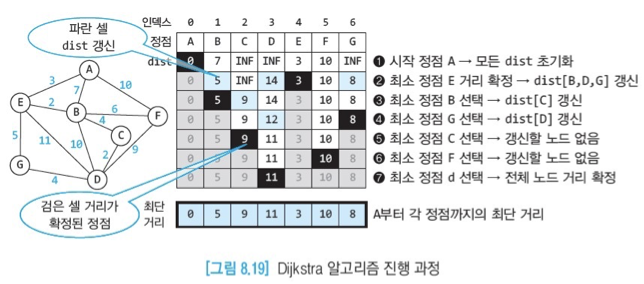

In [2]:
def shortest_path_dijkstra(vtx, adj, start) :

    vsize = len(vtx)          # 정점 수

    dist = list(adj[start])    # dist 배열 생성 및 초기화

    dist[start] = 0             # 시작정점의 거리 0

    path = [start] * vsize      # path 배열 생성 및 초기화

    found= [False] * vsize     # found 배열 생성 및 초기화

    found[start] = True       # 시작정점: 이미 찾아짐

 

    for i in range(vsize) :

        print("Step%2d: "%(i+1),dist) # 단계별 dist[] 출력용 

        u = getMinVertex(dist, found)   # 알고리즘 8.5 사용

        found[u] = True        # u는 이제 찾아짐

 

        for w in range(vsize) :    # 모든 정점에 대해

            if not found[w] :   # 아직 찾아지지 않았으면

                if dist[u] + adj[u][w] < dist[w] :   # 갱신 조건 검사

                    dist[w] = dist[u] + adj[u][w]    # dist 갱신

                    path[w] = u      # 이전 정점 갱신

 

    return path        # 찾아진 최단 경로 반환

 

 

def getMinVertex(dist, selected) :

    minv = -1

    mindist = INF

    for v in range(len(dist)) :      # 모든 정점들에 대해

        if not selected[v] and dist[v]<mindist :   # 선택 안 되었고  

            mindist = dist[v]      # 가중치가 작으면

            minv = v    # minv 갱신

    return minv    # 최소 가중치의 정점 반환

INF = 9999

vertex =   [  'A', 'B', 'C', 'D', 'E', 'F', 'G' ]

weight = [ [    0,   7, INF, INF,   3,  10, INF ],

           [    7,   0,   4,  10,   2,   6, INF ],

           [  INF,   4,   0,   2, INF, INF, INF ],

           [  INF,  10,   2,   0,  11,   9,   4 ],

           [    3,   2, INF,  11,   0,  13,   5 ],

           [   10,   6, INF,   9,  13,   0, INF ],

           [  INF, INF, INF,   4,   5, INF,   0 ]]

print("Shortest Path By Dijkstra Algorithm")
start = 0 # 시작 정점은 0번(A)
path = shortest_path_dijkstra(vertex, weight, start)
# 최종 경로를 출력하기 위한 코드
for end in range(len(vertex)) :
    if end != start :
        print("[최단경로: %s->%s] %s" %
                (vertex[start], vertex[end], vertex[end]), end='')
        while (path[end] != start) :
            print(" <- %s" % vertex[path[end]], end='')
            end = path[end]
        print(" <- %s" % vertex[path[end]])

Shortest Path By Dijkstra Algorithm
Step 1:  [0, 7, 9999, 9999, 3, 10, 9999]
Step 2:  [0, 5, 9999, 14, 3, 10, 8]
Step 3:  [0, 5, 9, 14, 3, 10, 8]
Step 4:  [0, 5, 9, 12, 3, 10, 8]
Step 5:  [0, 5, 9, 11, 3, 10, 8]
Step 6:  [0, 5, 9, 11, 3, 10, 8]
Step 7:  [0, 5, 9, 11, 3, 10, 8]
[최단경로: A->B] B <- E <- A
[최단경로: A->C] C <- B <- E <- A
[최단경로: A->D] D <- C <- B <- E <- A
[최단경로: A->E] E <- A
[최단경로: A->F] F <- A
[최단경로: A->G] G <- E <- A


### 시간복잡도 : O(n^2)
### Floyd 알고리즘은 모든 정점에서 모든 정점까지의 경로 찾는 시간 O(n^3)
### Dijkstra 알고리즘은 하나의 정점에서 모든 정점까지의 최단 경로를 찾는 시간 O(n^2)
### 따라서 두 알고리즘 차이 X Floyd 알고리즘은 매우 간결한 반복구문 사용
### Dijkstra 알고리즘의 장점
### Floyd 알고리즘과 달리 시작 정점을 선택가능, 거리뿐만 아니라 최단경로 구할 수 잇다.

### 8.6 허프만 코드
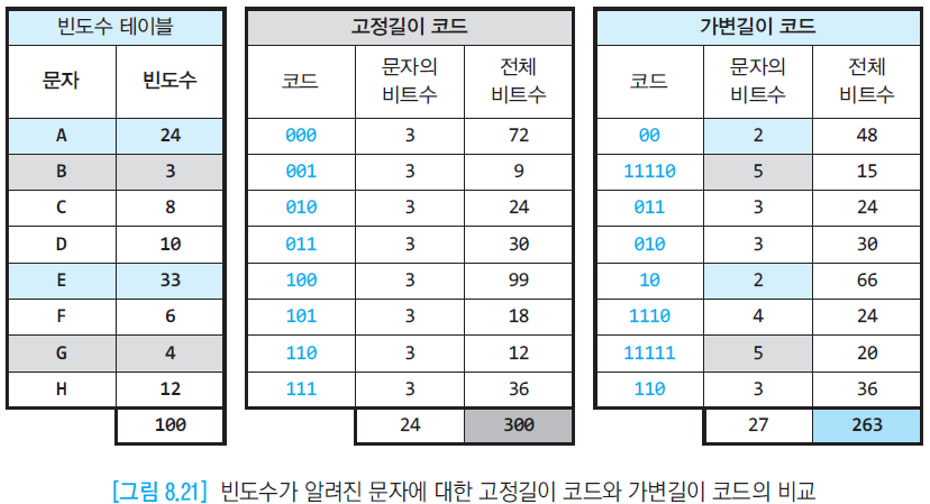
### 알파벳의 빈도를 잘 활용 -> 문서 압축하여 용량 줄일수 O
### A~H만을 사용하는 영어문서에 각 문자의 빈도수
### 아스키코드는 모든 문자 동일한 비트 수 사용 -> 고정길이 코드(압축관점에서 비효율적)
----
### 자주 사용되는 문자에 적은 비트 수 부여, 그렇지 않은 문자는 많은 비트수 부여
### E가 33번 B는 3번

### 고정길이는 3비트씩 해독, 가변길이는?
#### 1(x), 11(x), 111(x), 1110(f)순으로 테이블을검사, 첫문자는 F, 다음 0 , 00(A)순으로 검사
---
## 가변길이 코드 디코딩은?
## 접두어 없는(prefix-free) 코드
### 비트열을 왼쪽에서 오른쪽으로 조사하면 정확히 하나의 코드만  일치
### 빈도표 -> 가변길이코드
### 허프만 코드(Huffman codes)
### 탐욕적 전략 사용


## 허프만 코드 생성
- 허프만 트리
- 탐욕적인해 : 트리 중에서 루트의 값이 가장 작은 두 트리 선택
### 허프만 트리 생성 과정 -> 코드 부여
### b,s 가 가장 적은 빈도 선택 -> 루트?
### A-F와 루트 7에 최소 빈도수 6,7 선택 ->13
### 남은 루트 중 D(10), C(s) 선택 => 18
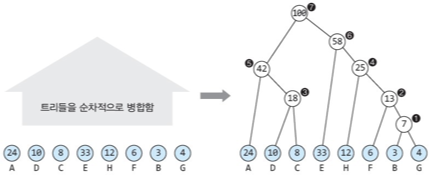

### 허프만 코드 부여
### 왼쪽 자식에0, 오른쪽 자식에는 1 부여
### A는 루트에서 왼쪽-왼쪽-2번이동 =>00, G는 오른쪽으로 5번 이동 11111부여
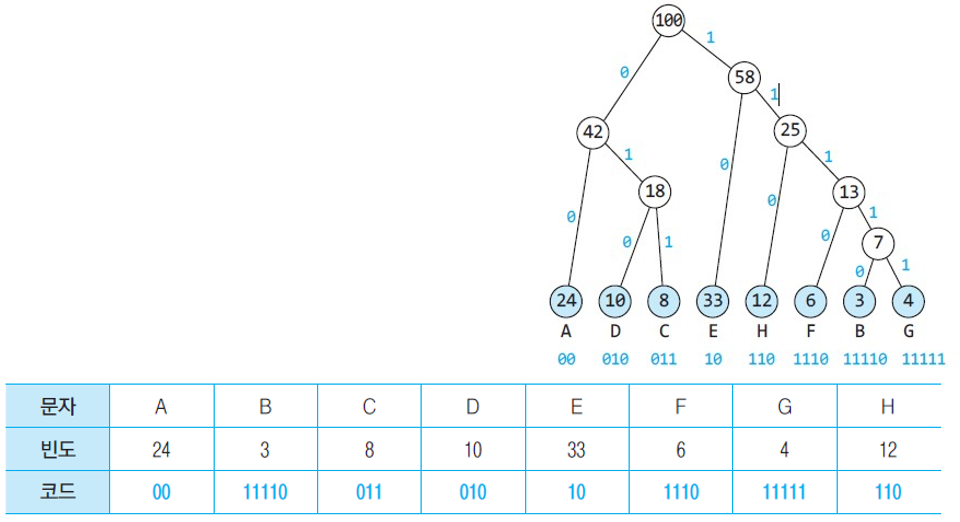

### 2(24%) + 3(10%)+ 3(8%) + 2(33%) + 3(12%) + 4(6%) + 5(3%) + 5(4%) = 2.63(평균)비트  

### 고정길이 3비트 보다 (3-2.63)/3*100% = 12.3% 압축률로 메모리 공간 절약


In [2]:

 

import heapq

def make_heap_tree(freq, label):

    n = len(freq)             # 문자의 개수

    h=[]                      # 힙을 위한 리스트

    for i in range(n):      # 모든 문자를 최소힙에 삽입
        heapq.heappush(h, (freq[i], label[i]))    # (키, 값) 삽입
    for i in range(1, n) :        # n-1번 병합
        e1 = heapq.heappop(h)     # 가장 작은 트리
        e2 = heapq.heappop(h)     # 다음 작은 트리
        heapq.heappush(h, (e1[0]+e2[0], e1[1]+e2[1]))  # 병합트리 삽입
        print(e1, "+", e2)     # 병합내용 출력
    print(heapq.heappop(h))   # 최종 트리의 루트 출력
label = [ 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H' ]

freq  = [24, 3, 8, 10, 33, 6, 4, 12]

make_heap_tree(freq, label)

(3, 'B') + (4, 'G')
(6, 'F') + (7, 'BG')
(8, 'C') + (10, 'D')
(12, 'H') + (13, 'FBG')
(18, 'CD') + (24, 'A')
(25, 'HFBG') + (33, 'E')
(42, 'CDA') + (58, 'HFBGE')
(100, 'CDAHFBGE')


## 시간복잡도(우선순위 큐 사용) O(nlog2^n) 
### 큐 만드는 과정 n번, 큐에 삽입, 삭제 -> O(log2^n)
### 가변길이 코드를 구하기 위해 추가 코드 필요